In [1]:
from tradingSimulator import TradingSimulator
simulator = TradingSimulator()

In [ ]:
# strategy in {
#     'Buy and Hold',
#     'Sell and Hold',
#     'Trend Following Moving Averages',
#     'Mean Reversion Moving Averages',
#     'TDQN'
# }
# cryptocurrency in {'Bitcoin', 'Ethereum'}

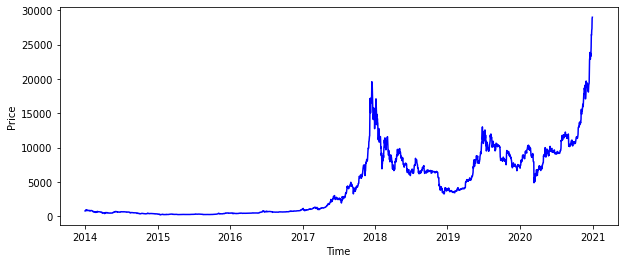

Augmented Dickey-Fuller test (ADF):
ADF Statistic: 1.612181
p-value: 0.997894


NameError: name 'loglog' is not defined

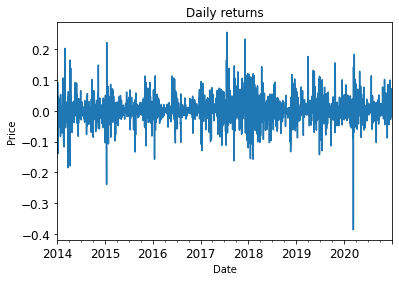

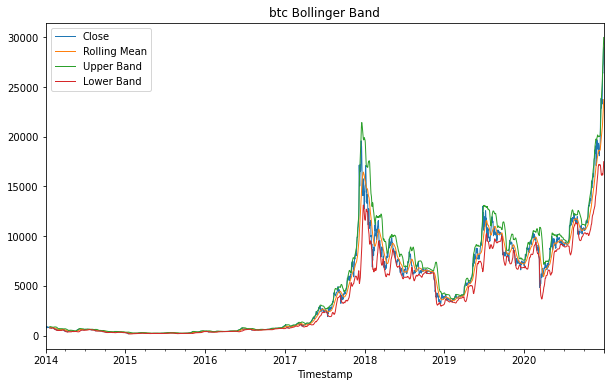

<Figure size 720x288 with 0 Axes>

In [2]:
cryptocurrency = "Bitcoin"
simulator.exploratoryDataAnalysis(cryptocurrency, '2014-01-01', '2021-01-01')

In [ ]:
stateLength = 30
AI_TRAINING_PARAM = {
    'startingDate': '2014-01-01',
    'endingDate': '2017-01-01',
    
    # Variables specifying the default capital at the disposal of the trader
    'money': 100000,
    
    # Variables setting up the default transaction costs
    'percentageCosts': [0, 0.1, 0.2],

    # Parameters related to the DQN algorithm
    'stateLength': stateLength,
    'numberOfEpisodes': 3,
    'gamma': 0.4,
    'learningRate': 0.0001,
    'targetNetworkUpdate': 1000,
    'learningUpdatePeriod': 1,

    # Parameters related to the Experience Replay mechanism
    'capacity': 100000,
    'batchSize': 32,
    'experiencesRequired': 1000,

    # Parameters related to the Epsilon-Greedy exploration technique
    'epsilonStart': 1.0,
    'epsilonEnd': 0.01,
    'epsilonDecay': 10000
}
AI_TRAINING_PARAM['transactionCosts'] = AI_TRAINING_PARAM['percentageCosts'][1]/100

AI_VALIDATION_BACKTEST_PARAM = {
    'startingDate': '2014-01-01',
    'endingDate': '2017-01-01',
    'money': 100000,
    'stateLength': stateLength,
    'transactionCosts': AI_TRAINING_PARAM['transactionCosts'],
    'name': 'validation_backtest'
}

AI_VALIDATION_PARAM = {
    'startingDate': '2017-01-01',
    'endingDate': '2019-01-01',
    'money': 100000,
    'stateLength': stateLength,
    'transactionCosts': AI_TRAINING_PARAM['transactionCosts'],
    'name': 'validation_test'
}

AI_BACKTEST_PARAM = {
    'startingDate': '2014-01-01',
    'endingDate': '2019-01-01',
    'money': 100000,
    'stateLength': stateLength,
    'transactionCosts': AI_TRAINING_PARAM['transactionCosts'],
    'name': 'backtest'
}

AI_TEST_PARAM = {
    'startingDate': '2019-01-01',
    'endingDate': '2021-01-01',
    'money': 100000,
    'stateLength': stateLength,
    'transactionCosts': AI_TRAINING_PARAM['transactionCosts'],
    'name': 'test'
}

AI_ETH_TEST_PARAM = {
    'startingDate': '2016-01-01',
    'endingDate': '2021-01-01',
    'money': 100000,
    'stateLength': stateLength,
    'transactionCosts': AI_TRAINING_PARAM['transactionCosts'],
    'name': 'test'
}

NON_AI_TRAINING_PARAM = {
    'startingDate': '2014-01-01',
    'endingDate': '2017-01-01',
    'money': 100000,
    'stateLength': stateLength,
    'percentageCosts': [0, 0.1, 0.2],
}
NON_AI_TRAINING_PARAM['transactionCosts'] = NON_AI_TRAINING_PARAM['percentageCosts'][1]/100

NON_AI_VALIDATION_BACKTEST_PARAM = {
    'startingDate': '2014-01-01',
    'endingDate': '2017-01-01',
    'money': 100000,
    'stateLength': stateLength,
    'transactionCosts': AI_TRAINING_PARAM['transactionCosts'],
    'name': 'validation_backtest'
}

NON_AI_VALIDATION_PARAM = {
    'startingDate': '2017-01-01',
    'endingDate': '2019-01-01',
    'money': 100000,
    'stateLength': stateLength,
    'transactionCosts': AI_TRAINING_PARAM['transactionCosts'],
    'name': 'validation_test'
}

NON_AI_BACKTEST_PARAM = {
    'startingDate': '2014-01-01',
    'endingDate': '2019-01-01',
    'money': 100000,
    'stateLength': stateLength,
    'transactionCosts': AI_TRAINING_PARAM['transactionCosts'],
    'name': 'backtest'
}

NON_AI_TEST_PARAM = {
    'startingDate': '2019-01-01',
    'endingDate': '2021-01-01',
    'money': 100000,
    'stateLength': stateLength,
    'transactionCosts': AI_TRAINING_PARAM['transactionCosts'],
    'name': 'test'
}

NON_AI_ETH_TEST_PARAM = {
    'startingDate': '2016-01-01',
    'endingDate': '2021-01-01',
    'money': 100000,
    'stateLength': stateLength,
    'transactionCosts': AI_TRAINING_PARAM['transactionCosts'],
    'name': 'test'
}

In [ ]:
strategy = "TDQN"
trainCryptocurrency = "Bitcoin"
simulator.aiTrain(strategy, trainCryptocurrency, AI_TRAINING_PARAM)
print()

In [ ]:
strategy = "TDQN"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Bitcoin"
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, AI_VALIDATION_BACKTEST_PARAM)
print()

In [ ]:
strategy = "TDQN"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Bitcoin"
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, AI_VALIDATION_PARAM)
print()

In [ ]:
strategy = "TDQN"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Bitcoin"
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, AI_BACKTEST_PARAM)
print()

In [ ]:
strategy = "TDQN"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Bitcoin"
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, AI_TEST_PARAM)
print()

In [ ]:
strategy = "TDQN"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Ethereum"
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, AI_ETH_TEST_PARAM)
print()

In [ ]:
strategy = "Buy and Hold"
trainCryptocurrency = "Bitcoin"
simulator.nonAiTrain(strategy, trainCryptocurrency, NON_AI_TRAINING_PARAM)
print()

In [ ]:
strategy = "Buy and Hold"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Bitcoin"
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, NON_AI_VALIDATION_PARAM)
print()

In [ ]:
strategy = "Buy and Hold"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Bitcoin"
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, NON_AI_TEST_PARAM)
print()

In [ ]:
strategy = "Buy and Hold"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Ethereum"
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, NON_AI_ETH_TEST_PARAM)
print()

In [ ]:
strategy = "Sell and Hold"
trainCryptocurrency = "Bitcoin"
simulator.nonAiTrain(strategy, trainCryptocurrency, NON_AI_TRAINING_PARAM)
print()

In [ ]:
strategy = "Sell and Hold"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Bitcoin"
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, NON_AI_VALIDATION_PARAM)
print()

In [ ]:
strategy = "Sell and Hold"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Bitcoin"
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, NON_AI_TEST_PARAM)
print()

In [ ]:
strategy = "Sell and Hold"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Ethereum"
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, NON_AI_ETH_TEST_PARAM)
print()

In [ ]:
strategy = "Trend Following Moving Averages"
trainCryptocurrency = "Bitcoin"
simulator.nonAiTrain(strategy, trainCryptocurrency, NON_AI_TRAINING_PARAM)
print()

In [ ]:
strategy = "Trend Following Moving Averages"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Bitcoin"
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, NON_AI_VALIDATION_PARAM)
print()

In [ ]:
strategy = "Trend Following Moving Averages"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Bitcoin"
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, NON_AI_TEST_PARAM)
print()

In [ ]:
strategy = "Trend Following Moving Averages"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Ethereum"
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, NON_AI_ETH_TEST_PARAM)
print()

In [ ]:
strategy = "Mean Reversion Moving Averages"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Bitcoin"
simulator.nonAitrain(strategy, trainCryptocurrency, NON_AI_TRAINING_PARAM)
print()

In [ ]:
strategy = "Mean Reversion Moving Averages"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Bitcoin"
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, NON_AI_VALIDATION_PARAM)
print()

In [ ]:
strategy = "Mean Reversion Moving Averages"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Bitcoin"
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, NON_AI_TEST_PARAM)
print()

In [ ]:
strategy = "Mean Reversion Moving Averages"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Ethereum"
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, NON_AI_ETH_TEST_PARAM)
print()